In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path = '..\\13_Streamlined Data Ingestion with pandas\\data\\'

# Introduction to spreadsheets

### Get data from a spreadsheet
In this exercise, you'll create a data frame from a "base case" Excel file: one with a single sheet of tabular data. The fcc_survey.xlsx file here has a sample of responses from FreeCodeCamp's annual New Developer Survey. This survey asks participants about their demographics, education, work and home life, plus questions about how they're learning to code. Let's load all of it.

pandas has not been pre-loaded in this exercise, so you'll need to import it yourself before using read_excel() to load the spreadsheet.

- Load the pandas library as pd.
- Read in fcc_survey.xlsx and assign it to the variable survey_responses.
- Print the first few records of survey_responses.

In [2]:
# Read spreadsheet and assign it to survey_responses
survey_responses = pd.read_excel(path + 'fcc-new-coder-survey.xlsx')

# View the head of the data frame
print(survey_responses.head())

   FreeCodeCamp New Developer Survey Responses, 2016        Unnamed: 1  \
0  Source: https://www.kaggle.com/freecodecamp/20...               NaN   
1                                                Age  AttendedBootcamp   
2                                                 28                No   
3                                                 22                No   
4                                                 19                No   

       Unnamed: 2         Unnamed: 3    Unnamed: 4         Unnamed: 5  \
0             NaN                NaN           NaN                NaN   
1  BootcampFinish  BootcampLoanYesNo  BootcampName  BootcampRecommend   
2             NaN                NaN           NaN                NaN   
3             NaN                NaN           NaN                NaN   
4             NaN                NaN           NaN                NaN   

       Unnamed: 6                     Unnamed: 7            Unnamed: 8  \
0             NaN                         

Depending on how and why an Excel file was generated, you might find spreadsheet imports as painless as this. Excel files created for human readers can get quite complicated, with headers, charts, and multiple tables on a sheet.

### Load a portion of a spreadsheet
Spreadsheets meant to be read by people often have multiple tables, e.g., a small business might keep an inventory workbook with tables for different product types on a single sheet. Even tabular data may have header rows of metadata, like the New Developer Survey data here. While the metadata is useful, we don't want it in a data frame. You'll use read_excel()'s skiprows keyword to get just the data. You'll also create a string to pass to usecols to get only columns AD and AW through BA, about future job goals.

pandas has been imported as pd.

- Create a single string, col_string, specifying that pandas should load column AD and the range AW through BA.
- Load fcc_survey_headers.xlsx', setting skiprows and usecols to skip the first two rows of metadata and get only the columns in col_string.
- View the selected column names in the resulting data frame.

In [3]:
# Create string of lettered columns to load
col_string = 'AD, AW:BA'

# Load data with skiprows and usecols set
survey_responses = pd.read_excel(path + 'fcc-new-coder-survey.xlsx', 
                        skiprows=2, 
                        usecols=col_string)

# View the names of the columns selected
print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


Nice job! If you need to get a table of data from a sheet with multiple tables on it, you can use skiprows, nrows, and usecols together to delineate which cells of data to read in.

# Getting data from multiple worksheets

### Select a single sheet
An Excel workbook may contain multiple sheets of related data. The New Developer Survey response workbook has sheets for different years. Because read_excel() loads only the first sheet by default, you've already gotten survey responses for 2016. Now, you'll create a data frame of 2017 responses using read_excel()'s sheet_name argument in a couple different ways.

pandas has been imported as pd.

- Create a data frame from the second workbook sheet by passing the sheet's position to

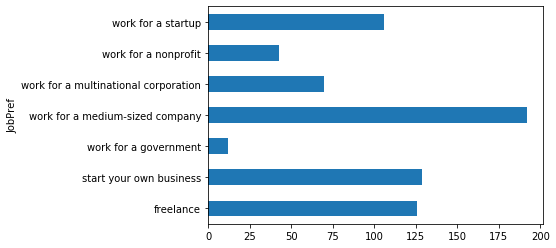

In [4]:
# Create df from second worksheet by referencing its position
responses_2017 = pd.read_excel(path + 'fcc-new-coder-survey.xlsx', 
                               skiprows=2, 
                               usecols=col_string, 
                               sheet_name=1)

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

- Create a data frame from the 2017 sheet by providing the sheet's name to read_excel().

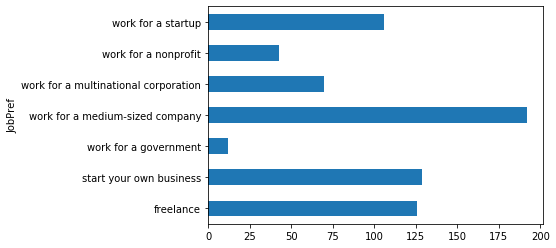

In [5]:
# Create df from second worksheet by referencing its name
responses_2017 = pd.read_excel(path + 'fcc-new-coder-survey.xlsx', 
                               skiprows=2, 
                               usecols=col_string,
                               sheet_name='2017')

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

Although it's possible to get multiple spreadsheets in an Excel file with one call to read_excel(), it can make more sense to use multiple calls if sheets contain very different data or layouts. That way, you can customize other arguments for each sheet.

### Select multiple sheets
So far, you've read Excel files one sheet at a time, which lets you you customize import arguments for each sheet. But if an Excel file has some sheets that you want loaded with the same parameters, you can get them in one go by passing a list of their names or indices to read_excel()'s sheet_name keyword. To get them all, pass None. You'll practice both methods to get data from fcc_survey.xlsx, which has multiple sheets of similarly-formatted data.

pandas has been loaded as pd.

- Load both the 2016 and 2017 sheets by name with a list and one call to read_excel().

In [6]:
# Load both the 2016 and 2017 sheets by name
all_survey_data = pd.read_excel(path + 'fcc-new-coder-survey.xlsx', 
                               skiprows=2, 
                               usecols=col_string,
                               sheet_name=['2016', '2017'])

# View the data type of all_survey_data
print(type(all_survey_data))

<class 'dict'>


- Load the 2016 sheet by its position (0) and 2017 by name. Note the sheet names in the result.

In [7]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel(path + 'fcc-new-coder-survey.xlsx', 
                               skiprows=2, 
                               usecols=col_string,
                               sheet_name=[0, '2017'])

# View the sheet names in all_survey_data
print(all_survey_data.keys())

dict_keys([0, '2017'])


- Load all sheets in the Excel file without listing them all.

In [8]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel(path + 'fcc-new-coder-survey.xlsx', 
                               skiprows=2, 
                               usecols=col_string,
                               sheet_name=None)

# View the sheet names in all_survey_data
print(all_survey_data.keys())

dict_keys(['2016', '2017'])


Well done! Notice that if you load a sheet by its index position, the resulting data frame's name is also the index number, not the sheet name.

### Work with multiple spreadsheets
Workbooks meant primarily for human readers, not machines, may store data about a single subject across multiple sheets. For example, a file may have a different sheet of transactions for each region or year in which a business operated.

The FreeCodeCamp New Developer Survey file is set up similarly, with samples of responses from different years in different sheets. Your task here is to compile them in one data frame for analysis.

pandas has been imported as pd. All sheets have been read into the ordered dictionary responses, where sheet names are keys and data frames are values, so you can get data frames with the values() method.

- Create an empty data frame, all_responses.
- Set up a for loop to iterate through the values in the responses dictionary.
- Append each data frame to all_responses and reassign the result to the same variable name.

Adding 1000 rows
Adding 1000 rows


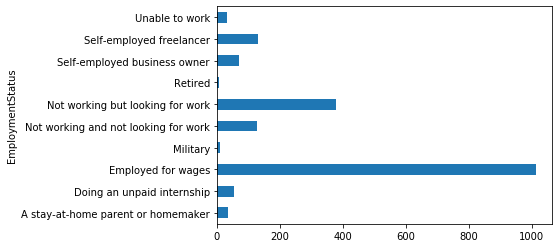

In [9]:
# Load all sheets in the Excel file
responses = pd.read_excel(path + 'fcc-new-coder-survey.xlsx', 
                               skiprows=2,
                               sheet_name=None)

# Create an empty data frame
all_responses = pd.DataFrame()

# Set up for loop to iterate through values in responses
for df in responses.values():
  # Print the number of rows being added
  print("Adding {} rows".format(df.shape[0]))
  # Append df to all_responses, assign result
  all_responses = all_responses.append(df)

# Graph employment statuses in sample
counts = all_responses.groupby("EmploymentStatus").EmploymentStatus.count()
counts.plot.barh()
plt.show()

Good work! You compiled similar spreadsheets into one dataset. This method works well when you know your spreadsheets use the same column names. If they don't, you can end up with lots of NA values where column names don't align.

# Modifying imports: true/false data

### Set Boolean columns
Datasets may have columns that are most accurately modeled as Boolean values. However, pandas usually loads these as floats by default, since defaulting to Booleans may have undesired effects like turning NA values into Trues.

fcc_survey_subset.xlsx contains a string ID column and several True/False columns indicating financial stressors. You'll evaluate which non-ID columns have no NA values and therefore can be set as Boolean, then tell read_excel() to load them as such with the dtype argument.

pandas is loaded as pd.

- Count NA values in each column of survey_data with isna() and sum(). Note which columns besides ID.x, if any, have zero NAs.

In [10]:
cols = 'AP, AH, AI, AK, AM'

# Load the data
survey_data = pd.read_excel(path + 'fcc-new-coder-survey.xlsx',
                            usecols=cols, skiprows=2)

# Count NA values in each column
print(survey_data.isna().sum())

HasDebt                     0
HasFinancialDependents      9
HasHomeMortgage           499
HasStudentDebt            502
ID.x                        0
dtype: int64


- Set read_excel()'s dtype argument to load the HasDebt column as Boolean data.
- Supply the Boolean column name to the print statement to view financial burdens by group.

In [11]:
# Set dtype to load appropriate column(s) as Boolean data
survey_data = pd.read_excel(path + 'fcc-new-coder-survey.xlsx',
                            usecols=cols, skiprows=2, dtype={'HasDebt':bool})

# View financial burdens by Boolean group
print(survey_data.groupby('HasDebt').sum())

         HasFinancialDependents  HasHomeMortgage  HasStudentDebt
HasDebt                                                         
False                     112.0              0.0             0.0
True                      205.0            151.0           281.0


Great work! Modeling True/False data as Booleans can streamline some data manipulation functions and keep spurious summary statistics, like quartile values, from being calculated. If you want to make a column with NA values Boolean, you can load the data, impute missing values, then re-cast the column as Boolean.

Set custom true/false values
In Boolean columns, pandas automatically recognizes certain values, like "TRUE" and 1, as True, and others, like "FALSE" and 0, as False. Some datasets, like survey data, can use unrecognized values, such as "Yes" and "No".

For practice purposes, some Boolean columns in the New Developer Survey have been coded this way. You'll make sure they're properly interpreted with the help of the true_values and false_values arguments.

pandas is loaded as pd. You can assume the columns you are working with have no missing values.

- Load the Excel file, specifying "Yes" as a true value and "No" as a false value.

In [12]:
# prep
cols = 'B, AP, AH, AI, AK, AM'

# Load file with Yes as a True value and No as a False value
survey_subset = pd.read_excel(path + 'fcc-new-coder-survey.xlsx', usecols=cols, skiprows=2,
                              dtype={"HasDebt": bool, "AttendedBootCampYesNo": bool},
                              true_values=['Yes'],
                              false_values=['No'])

# View the data
print(survey_subset.head())

   AttendedBootcamp  HasDebt  HasFinancialDependents  HasHomeMortgage  \
0             False     True                     1.0              0.0   
1             False    False                     0.0              NaN   
2             False    False                     0.0              NaN   
3             False     True                     0.0              0.0   
4             False     True                     0.0              0.0   

   HasStudentDebt                              ID.x  
0             1.0  cef35615d61b202f1dc794ef2746df14  
1             NaN  323e5a113644d18185c743c241407754  
2             NaN  b29a1027e5cd062e654a63764157461d  
3             1.0  04a11e4bcb573a1261eb0d9948d32637  
4             0.0  9368291c93d5d5f5c8cdb1a575e18bec  


Bravo! Building a data pipeline that sets Boolean dtypes and uses custom true and false values requires being very familiar with the data. It's a good idea to import the data as-is and explore it before doing so.

# Modifying imports: parsing dates

### Parse simple dates
pandas does not infer that columns contain datetime data; it interprets them as object or string data unless told otherwise. Correctly modeling datetimes is easy when they are in a standard format -- we can use the parse_dates argument to tell read_excel() to read columns as datetime data.

The New Developer Survey responses contain some columns with easy-to-parse timestamps. In this exercise, you'll make sure they're the right data type.

pandas has been loaded as pd.

- Load fcc_survey.xlsx, making sure that the Part1StartTime column is parsed as datetime data.
- View the first few values of the survey_data.Part1StartTime to make sure it contains datetimes.

In [13]:
# Load file, with Part1StartTime parsed as datetime data
survey_data = pd.read_excel(path + 'fcc-new-coder-survey.xlsx', skiprows=2,
                            parse_dates=['Part1StartTime'])

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())

0   2016-03-29 21:23:13
1   2016-03-29 21:24:59
2   2016-03-29 21:25:37
3   2016-03-29 21:21:37
4   2016-03-29 21:26:22
Name: Part1StartTime, dtype: datetime64[ns]


pandas can automatically parse many common date and time formats. It can even parse standalone times, without dates, but the parsed times will have the date the code was run.

### Get datetimes from multiple columns
Sometimes, datetime data is split across columns. A dataset might have a date and a time column, or a date may be split into year, month, and day columns.

A column in this version of the survey data has been split so that dates are in one column, Part2StartDate, and times are in another, Part2StartTime. Your task is to use read_excel()'s parse_dates argument to combine them into one datetime column with a new name.

pandas has been imported as pd.

- Create a dictionary, datetime_cols indicating that the new column Part2Start should consist of Part2StartDate and Part2StartTime.
- Load the survey response file, supplying the dictionary to the parse_dates argument to create a new Part2Start column.
- View summary statistics about the new Part2Start column with the describe() method.

In [14]:
# Create dict of columns to combine into new datetime column
datetime_cols = {"Part2Start": ["Part2StartDate", "Part2StartTime"]}


# Load file, supplying the dict to parse_dates
survey_data = pd.read_excel(path + 'fcc-new-coder-survey.xlsx', skiprows=2,
                            parse_dates=datetime_cols)

# View summary statistics about Part2Start
print(survey_data.Part2Start.describe())

count                    1000
unique                    985
top       2016-03-30 01:29:27
freq                        2
first     2016-03-29 21:24:57
last      2016-03-30 09:08:18
Name: Part2Start, dtype: object


Well done! Note that the keys in a dictionary passed to parse_dates cannot be names of columns already in the data frame. Also, when combining columns to parse, their order in the list does not matter.

Parse non-standard date formats
So far, you've parsed dates that pandas could interpret automatically. But if a date is in a non-standard format, like 19991231 for December 31, 1999, it can't be parsed at the import stage. Instead, use pd.to_datetime() to convert strings to dates after import.

The New Developer Survey data has been loaded as survey_data but contains an unparsed datetime field. We'll use to_datetime() to convert it, passing in the column to convert and a string representing the date format used.

For more on date format codes, see this reference. Some common codes are year (%Y), month (%m), day (%d), hour (%H), minute (%M), and second (%S).

pandas has been imported as pd.

- Parse Part2EndTime using pd.to_datetime(), the format keyword argument, and the format string you just identified ('%m%d%Y %H:%M:%S'). Assign the result back to the Part2EndTime column.

In [15]:
# Dataset fehlt
# Parse datetimes and assign result back to Part2EndTime
# survey_data["Part2EndTime"] = pd.to_datetime(survey_data["Part2EndTime"], format='%m%d%Y %H:%M:%S')

- Print the head of Part2EndTime to confirm the column now contains datetime values.

In [16]:
# Print first few values of Part2EndTime
# print(survey_data["Part2EndTime"].head())

Nice work! Datetime information comes in a variety of formats, and having the skills to parse them lets you perform time-specific operations like calculating intervals.